# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

<u>Goals</u>
 - Clean + fix any data issues
 - Generate any extra data needed for reporting
 - Explore the datasets -> explore how the different plans can interact with the different variables
 - Explore how revenue can change depending on other variables (plan etc.)
 - Perform statistical test on the hypotheses
 - Written Conclusion

## Initialization

adding needed libraries for data exploration + plotting to complete the data analysis

In [101]:
# Loading all the libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy import stats as st

# imported for merging DataFrames
from functools import reduce 


## Load data

### 5 different datasets to load
 - calls
 - internet
 - messages
 - plans
 - users

In [102]:
# Load the data files into different DataFrames
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
# calls_df.head()

internet_df = pd.read_csv('/datasets/megaline_internet.csv')
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
plans_df = pd.read_csv('/datasets/megaline_plans.csv')
users_df = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

## Plans

In [103]:
# Print the general/summary information about the plans' DataFrame
plans_df.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [104]:
# Print a sample of data for plans
plans_df.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [105]:
plans_df.dtypes

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object


### Plans data overview

 - only two rows in the plans DataFrame (relating to each of the megaline packages)
 - no missing values for any columns
 - all numerical data besides the plan_name field 
 - Overall the datatypes seem to align well to the fields
 
 #### Potential issues/fixes
  - We have both int and float datatypes. If Calculations are done with the ints that could potentially result in decimals, we may want to change the datatype to a float to perserve these.
  - The above is relevant to the usd_monthly_pay and usd_per_gb, these have no decimals (cents) which we may want to include since it is a currency  
  
  *The above may not be needed but would make it more consistent with other USD fields*

## Fix data

We are going to precautiously convert the USD columns to floats. 

In [106]:
# Convert columns to float
plans_df['usd_monthly_pay'] = plans_df['usd_monthly_pay'].astype('float')
plans_df['usd_per_gb'] = plans_df['usd_per_gb'].astype('float')

# view results
print(plans_df.dtypes) 
plans_df.head()

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay          float64
usd_per_gb               float64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


## Enrich data

In [107]:
# Nothing to add as of now. Come back later?

## Users

In [108]:
# Print the general/summary information about the users' DataFrame
users_df.describe()


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [109]:
# Print a sample of data for users
users_df.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [110]:
# Explore NaN counts by column after seeing in churn_date sample
users_df.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [111]:
users_df.dtypes

user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object


### Users Data Overview
 - we have 500 user records
 - All the data IDs or describes information on the user
 - Most columns are stored as objects (str), the two numerical columns are ID and age. 
 - The churn_date is mostly null, with 466/500 values missing. 
 - the plan column relates to the plan_name column in the plans df, this can be joined so we have detailed plan information with per user 
 
  #### potentials issues/fixes
  - There are two date fields currently stored as objects, these can be changed to date datatypes
  - city has additional information that we could split out to multiple columns if wanted (split by ,)
  - though there are a lot of values missing in churn_date, it is not appropriate to impute values here

### Fix Data

Converting our two date fields to the correct datatypes

In [112]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'])
print(users_df.dtypes)
users_df.head(10)

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


### Enrich Data

Here we a create a binary 1,0 for whether a user churned to allow easier analysis later (easily pick out churned customers if needed) 

1 - customer churned 

0 - customer has NOT churned

In [113]:
users_df['churned'] = np.where(np.isnat(users_df['churn_date']), 0, 1)

# check results to confirm it worked as expected
users_df.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,churned
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,0
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,0
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT,0
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,0
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,0


## Calls

In [114]:
# Print the general/summary information about the calls' DataFrame
calls_df.describe()


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [115]:
# Print a sample of data for calls
calls_df.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [116]:
calls_df.dtypes

id            object
user_id        int64
call_date     object
duration     float64
dtype: object

In [117]:
calls_df.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64


### Calls data overview
 - this data shows a record for each call
 - the user_id can link back to the id in the user_df 
 - there are no columns with Null values
 
 #### potential issues/fixes
 - again here we can fix the date column to be the correct datatype
 - The duration column includes a decimal, we know this data is by minute, but we also know the company rounds up to whole minutes. This makes the decimal in the column not useful. We should round this column UP and remove the decimal. 

### Fix data

We convert the date column to the correct datatype 

In [118]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])
calls_df.dtypes

id                   object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object

### Enrich data

Add an additional column that rounds the duration up to align with billing

In [119]:
calls_df['duration_rounded'] = calls_df['duration'].apply(np.ceil)
calls_df.head(10)

,id,user_id,call_date,duration,duration_rounded
0,1000_93,1000,2018-12-27,8.52,9.0
1,1000_145,1000,2018-12-27,13.66,14.0
2,1000_247,1000,2018-12-27,14.48,15.0
3,1000_309,1000,2018-12-28,5.76,6.0
4,1000_380,1000,2018-12-30,4.22,5.0
5,1000_388,1000,2018-12-31,2.20,3.0
6,1000_510,1000,2018-12-27,5.75,6.0
7,1000_521,1000,2018-12-28,14.18,15.0
8,1000_530,1000,2018-12-28,5.77,6.0
9,1000_544,1000,2018-12-26,4.40,5.0


## Messages

In [120]:
# Print the general/summary information about the messages' DataFrame
messages_df.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [121]:
# Print a sample of data for messages
messages_df.head(10)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [122]:
messages_df.dtypes

id              object
user_id          int64
message_date    object
dtype: object

In [123]:
messages_df.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64


### Messages data overview
 - This is a very simple data structure where each row represents a message sent by a user
 - The user_id column can relate to the user_df 
 - There are no null values
 - To do any analysis we will want to do a count of records aggregated by user and or date to get a feel of how many messages have been sent. 
 
 #### potential issues/fixes
  - The only thing to look at here is the message_date, we can fix the datatype to be a date

### Fix data

adjust message_date field to be a date

In [124]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])
messages_df.dtypes

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

### Enrich data

No Enrichment needed

## Internet

In [125]:
# Print the general/summary information about the internet DataFrame
internet_df.describe()


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [126]:
# Print a sample of data for the internet traffic
internet_df.head(10)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [127]:
internet_df.dtypes

id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object

In [128]:
internet_df.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


### internet data overview
 - Each record represents a session of usage and the amount of data used. 
 - In this instance we only round at a monthly level, we may want to extract month from the session date for use in analysis later. 
 - We may also want to create a GB column from the MB usage for easier aggregation/rounding later
 - Once again we can link to a user using the user_id 
 
 #### Potential issues/fixes
 - We can change the date to the correct datetime. 
 - The mb_used field can be left alone
  

### Fix data

We correct the date datatype in the session_date field

In [129]:
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])
internet_df.dtypes

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

### Enrich data

Here we add a month column that may be used in future analysis (billing is rounded up on to GB on monthly use)
We also add a GB usage column (derived from mb used) 

In [130]:
internet_df['month'] = internet_df['session_date'].dt.month
internet_df['gb_used'] = internet_df['mb_used'] / 1024

internet_df.head(10)

,id,user_id,session_date,mb_used,month,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590
5,1001_0,1001,2018-08-24,284.68,8,0.278008
6,1001_3,1001,2018-12-09,656.04,12,0.640664
7,1001_4,1001,2018-11-04,16.97,11,0.016572
8,1001_10,1001,2018-11-27,135.18,11,0.132012
9,1001_15,1001,2018-12-13,761.92,12,0.744062


## Study plan conditions

In [131]:
# Print out the plan conditions and make sure they are clear for you
plans_df


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


## Aggregate data per user


In [132]:
# Calculate the number of calls made by each user per month. Save the result.
calls_df['month'] = calls_df['call_date'].dt.month
aggr_calls_df = calls_df[['id','user_id', 'month']].groupby(['user_id', 'month']).count()
aggr_calls_df = aggr_calls_df.rename(columns={'id': 'call_count'})
aggr_calls_df

call_count
user_id month            
1000    12             16
1001    8              27
        9              49
        10             65
        11             64
...                   ...
1498    12             39
1499    9              41
        10             53
        11             45
        12             65

[2258 rows x 1 columns]

In [133]:
# Calculate the amount of minutes spent by each user per month. Save the result.
# we will use the rounded value we created earlier so billing is correct
aggr_minutes_df =  calls_df[['user_id', 'month', 'duration_rounded']].groupby(['user_id', 'month']).sum()
aggr_minutes_df = aggr_minutes_df.rename(columns={'duration_rounded': 'billable_minutes'})
aggr_minutes_df

billable_minutes
user_id month                  
1000    12                124.0
1001    8                 182.0
        9                 315.0
        10                393.0
        11                426.0
...                         ...
1498    12                339.0
1499    9                 346.0
        10                385.0
        11                308.0
        12                496.0

[2258 rows x 1 columns]

In [134]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_df['month'] = messages_df['message_date'].dt.month
aggr_messages_df =  messages_df[['id', 'user_id', 'month']].groupby(['user_id', 'month']).count()
aggr_messages_df = aggr_messages_df.rename(columns={'id': 'messages_count'})
aggr_messages_df

messages_count
user_id month                
1000    12                 11
1001    8                  30
        9                  44
        10                 53
        11                 36
...                       ...
1496    9                  21
        10                 18
        11                 13
        12                 11
1497    12                 50

[1806 rows x 1 columns]

In [135]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
aggr_internet_df = internet_df[['user_id', 'month', 'mb_used', 'gb_used']].groupby(['user_id', 'month']).sum()
aggr_internet_df

mb_used    gb_used
user_id month                     
1000    12      1901.47   1.856904
1001    8       6919.15   6.756982
        9      13314.82  13.002754
        10     22330.49  21.807119
        11     18504.30  18.070605
...                 ...        ...
1498    12     23137.69  22.595400
1499    9      12984.76  12.680430
        10     19492.43  19.035576
        11     16813.83  16.419756
        12     22059.21  21.542197

[2277 rows x 2 columns]

In [136]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
# we fill NA and outer join to make sure we keep all datapoints and fill zeroes where values do not exist 
data_frames = [aggr_internet_df, aggr_messages_df, aggr_minutes_df, aggr_calls_df]
df = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), data_frames).fillna(0)
df

mb_used    gb_used  messages_count  billable_minutes  \
user_id month                                                          
1000    12      1901.47   1.856904            11.0             124.0   
1001    8       6919.15   6.756982            30.0             182.0   
        9      13314.82  13.002754            44.0             315.0   
        10     22330.49  21.807119            53.0             393.0   
        11     18504.30  18.070605            36.0             426.0   
...                 ...        ...             ...               ...   
1470    12         0.00   0.000000           153.0             592.0   
1482    10         0.00   0.000000             2.0               0.0   
1484    11         0.00   0.000000             1.0              38.0   
1491    4          0.00   0.000000             6.0              44.0   
1044    8          0.00   0.000000             0.0              13.0   

               call_count  
user_id month              
1000    12           16.0  
1001    8            27.0  
        9            49.0  
        10           65.0  
        11           64.0  
...                   ...  
1470    12           78.0  
1482    10            0.0  
1484    11            2.0  
1491    4             8.0  
1044    8             1.0  

[2293 rows x 5 columns]

In [137]:
# Add the plan information
df = df.reset_index()
df = pd.merge(df,users_df[['user_id','plan']], on=['user_id'], how='left')
df

,user_id,month,mb_used,gb_used,messages_count,billable_minutes,call_count,plan
0,1000,12,1901.47,1.856904,11.0,124.0,16.0,ultimate
1,1001,8,6919.15,6.756982,30.0,182.0,27.0,surf
2,1001,9,13314.82,13.002754,44.0,315.0,49.0,surf
3,1001,10,22330.49,21.807119,53.0,393.0,65.0,surf
4,1001,11,18504.30,18.070605,36.0,426.0,64.0,surf
...,...,...,...,...,...,...,...,...
2288,1470,12,0.00,0.000000,153.0,592.0,78.0,surf
2289,1482,10,0.00,0.000000,2.0,0.0,0.0,ultimate
2290,1484,11,0.00,0.000000,1.0,38.0,2.0,surf
2291,1491,4,0.00,0.000000,6.0,44.0,8.0,surf


In [138]:
df = df.rename(columns={'plan': 'plan_name'})
df = pd.merge(df, plans_df, on=['plan_name'], how='left')
df

,user_id,month,mb_used,gb_used,messages_count,billable_minutes,call_count,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,1901.47,1.856904,11.0,124.0,16.0,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01
1,1001,8,6919.15,6.756982,30.0,182.0,27.0,surf,50,15360,500,20.0,10.0,0.03,0.03
2,1001,9,13314.82,13.002754,44.0,315.0,49.0,surf,50,15360,500,20.0,10.0,0.03,0.03
3,1001,10,22330.49,21.807119,53.0,393.0,65.0,surf,50,15360,500,20.0,10.0,0.03,0.03
4,1001,11,18504.30,18.070605,36.0,426.0,64.0,surf,50,15360,500,20.0,10.0,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1470,12,0.00,0.000000,153.0,592.0,78.0,surf,50,15360,500,20.0,10.0,0.03,0.03
2289,1482,10,0.00,0.000000,2.0,0.0,0.0,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01
2290,1484,11,0.00,0.000000,1.0,38.0,2.0,surf,50,15360,500,20.0,10.0,0.03,0.03
2291,1491,4,0.00,0.000000,6.0,44.0,8.0,surf,50,15360,500,20.0,10.0,0.03,0.03


Here we calculate the revenue in each of the three categories of revenue. We then add the billing rate to get total revenue. After done we display the dataFrame so we can spot check the calculations

In [139]:
# Calculate the monthly revenue for each user
# Calculate each Segment revenue to simplify
# Messages
df['messages_revenue'] = np.where(df['messages_count'] > df['messages_included'], 
                                  (df['messages_count']-df['messages_included'])*df['usd_per_message'], 
                                  0)
# Internet
df['internet_revenue'] = np.where(df['gb_used'] > (df['mb_per_month_included']/1024), 
                                    np.ceil((df['gb_used'] - (df['mb_per_month_included']/1024)))*df['usd_per_gb'], 
                                   0)
# Call Minutes
df['call_revenue'] = np.where(df['billable_minutes'] > df['minutes_included'], 
                             (df['billable_minutes'] - df['minutes_included'])*df['usd_per_minute'], 
                              0)


df

,user_id,month,mb_used,gb_used,messages_count,billable_minutes,call_count,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,messages_revenue,internet_revenue,call_revenue
0,1000,12,1901.47,1.856904,11.0,124.0,16.0,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,0.00,0.0,0.00
1,1001,8,6919.15,6.756982,30.0,182.0,27.0,surf,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.0,0.00
2,1001,9,13314.82,13.002754,44.0,315.0,49.0,surf,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.0,0.00
3,1001,10,22330.49,21.807119,53.0,393.0,65.0,surf,50,15360,500,20.0,10.0,0.03,0.03,0.09,70.0,0.00
4,1001,11,18504.30,18.070605,36.0,426.0,64.0,surf,50,15360,500,20.0,10.0,0.03,0.03,0.00,40.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1470,12,0.00,0.000000,153.0,592.0,78.0,surf,50,15360,500,20.0,10.0,0.03,0.03,3.09,0.0,2.76
2289,1482,10,0.00,0.000000,2.0,0.0,0.0,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,0.00,0.0,0.00
2290,1484,11,0.00,0.000000,1.0,38.0,2.0,surf,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.0,0.00
2291,1491,4,0.00,0.000000,6.0,44.0,8.0,surf,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.0,0.00


In [140]:
# Calc total revenue
df['total_revenue'] = df['messages_revenue'] + df['internet_revenue'] + df['call_revenue'] + df['usd_monthly_pay']
df

,user_id,month,mb_used,gb_used,messages_count,billable_minutes,call_count,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,messages_revenue,internet_revenue,call_revenue,total_revenue
0,1000,12,1901.47,1.856904,11.0,124.0,16.0,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,0.00,0.0,0.00,70.00
1,1001,8,6919.15,6.756982,30.0,182.0,27.0,surf,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.0,0.00,20.00
2,1001,9,13314.82,13.002754,44.0,315.0,49.0,surf,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.0,0.00,20.00
3,1001,10,22330.49,21.807119,53.0,393.0,65.0,surf,50,15360,500,20.0,10.0,0.03,0.03,0.09,70.0,0.00,90.09
4,1001,11,18504.30,18.070605,36.0,426.0,64.0,surf,50,15360,500,20.0,10.0,0.03,0.03,0.00,40.0,0.00,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1470,12,0.00,0.000000,153.0,592.0,78.0,surf,50,15360,500,20.0,10.0,0.03,0.03,3.09,0.0,2.76,25.85
2289,1482,10,0.00,0.000000,2.0,0.0,0.0,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,0.00,0.0,0.00,70.00
2290,1484,11,0.00,0.000000,1.0,38.0,2.0,surf,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.0,0.00,20.00
2291,1491,4,0.00,0.000000,6.0,44.0,8.0,surf,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.0,0.00,20.00


## Study user behaviour

In [141]:
# Creating plan filters for plotting
ultimate = df['plan_name']=='ultimate'
surf = df['plan_name']=='surf'

print('records under ultimate plan:',len(df[ultimate]))
print('records under surf plan:',len(df[surf]))

records under ultimate plan: 720
records under surf plan: 1573


### Calls

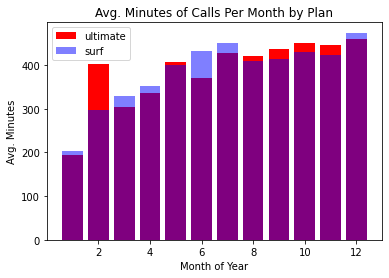

In [142]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
avg_call_df = df[['month', 'billable_minutes', 'plan_name']].groupby(['plan_name', 'month']).mean().reset_index()

plt.bar(avg_call_df['month'][avg_call_df['plan_name']=='ultimate'], avg_call_df['billable_minutes'][avg_call_df['plan_name']=='ultimate'], color='red', label='ultimate')
plt.bar(avg_call_df['month'][avg_call_df['plan_name']=='surf'], avg_call_df['billable_minutes'][avg_call_df['plan_name']=='surf'], color='blue', alpha=0.5, label='surf')
plt.title('Avg. Minutes of Calls Per Month by Plan')
plt.xlabel('Month of Year')
plt.ylabel('Avg. Minutes')
plt.legend()
plt.show()

Minutes summary Ultimate Plan - 
 count     720.000000
mean      430.450000
std       240.508762
min         0.000000
25%       260.000000
50%       424.000000
75%       565.250000
max      1369.000000
Name: billable_minutes, dtype: float64
Minutes summary Surf Plan - 
 count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: billable_minutes, dtype: float64
----------------------------------------
Minutes Variance Ultimate Plan -  57844.46481223922
Minutes Variance Surf Plan -  54968.27946065038
----------------------------------------


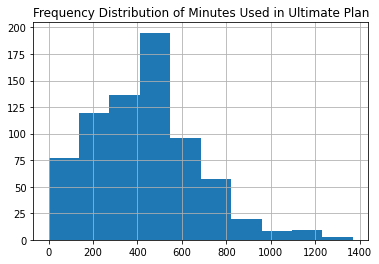

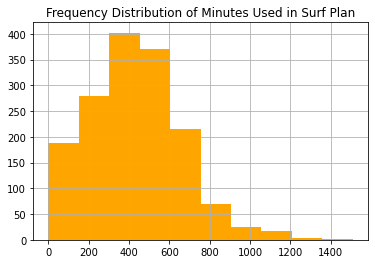

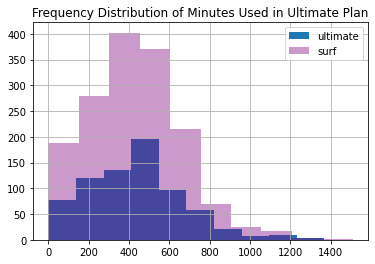

In [143]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
print('Minutes summary Ultimate Plan - \n', df['billable_minutes'][ultimate].describe())
print('Minutes summary Surf Plan - \n', df['billable_minutes'][surf].describe())

print('----------------------------------------')

print('Minutes Variance Ultimate Plan - ', df['billable_minutes'][ultimate].var())
print('Minutes Variance Surf Plan - ', df['billable_minutes'][surf].var())

print('----------------------------------------')

# Generate histograms to view frequencies
df['billable_minutes'][ultimate].hist()
plt.title('Frequency Distribution of Minutes Used in Ultimate Plan')
plt.show()
df['billable_minutes'][surf].hist(color='orange')
plt.title('Frequency Distribution of Minutes Used in Surf Plan')
plt.show()

# Combine histograms with alpha to see overlay
df['billable_minutes'][ultimate].hist(label='ultimate')
df['billable_minutes'][surf].hist(color='purple', alpha=.4, label='surf')
plt.title('Frequency Distribution of Minutes Used in Ultimate Plan')
plt.legend()
plt.show()

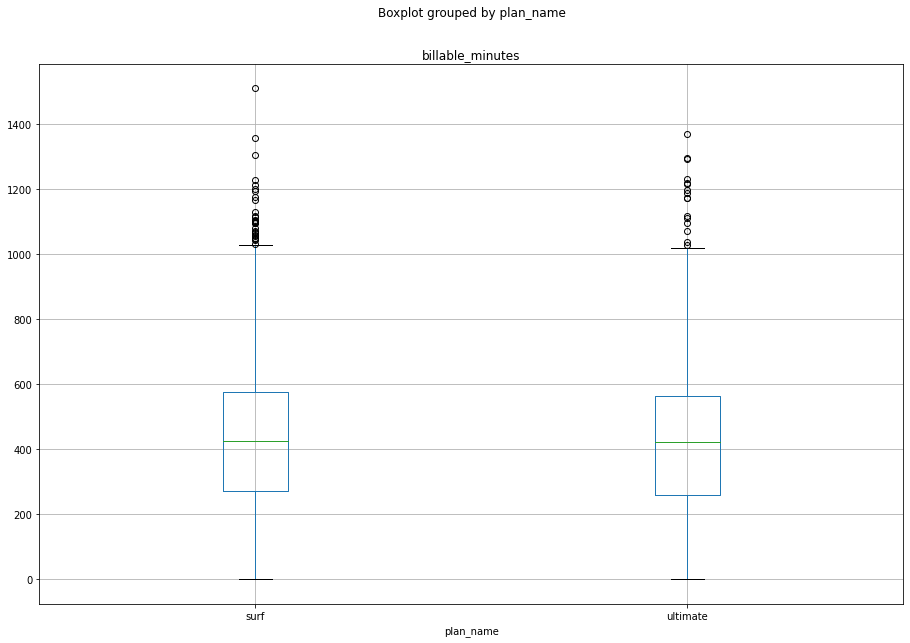

In [144]:
# Plot a boxplot to visualize the distribution of the monthly call duration
df.boxplot(column='billable_minutes', by='plan_name', figsize=(15,10))
plt.show()

#### Call Data Findings
The Histograms are pretty interesting for the minutes used. While both are similar there is one main difference. In the ultimate plan there are a LOT of occurances in the 400-500 bin. While the Surf plan has a much more even (slightly normal?) distribution around the 300-400, 400-500, 500-600 buckets. Both have similar right tails where only a few users are using large amounts of minutes in a given month. 

From the above Plots and stats, we can see that the minute usage remains very similair across the surf and ultimate plan. The Average, Variance, and distribution of the plans remain similar. While it appears that the surf plan may have a few more outliers on the boxplot, there is no conclusive evidence that behavior on calls is different between the users on the different plans.

### Messages

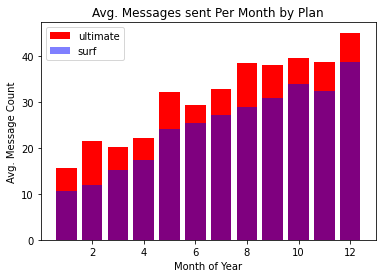

In [145]:
# Plotting Avg. messages per month per plan
avg_messages_df = df[['month', 'messages_count', 'plan_name']].groupby(['plan_name', 'month']).mean().reset_index()

plt.bar(avg_messages_df['month'][avg_messages_df['plan_name']=='ultimate'], avg_messages_df['messages_count'][avg_messages_df['plan_name']=='ultimate'], color='red', label='ultimate')
plt.bar(avg_messages_df['month'][avg_messages_df['plan_name']=='surf'], avg_messages_df['messages_count'][avg_messages_df['plan_name']=='surf'], color='blue', alpha=0.5, label='surf')
plt.title('Avg. Messages sent Per Month by Plan')
plt.xlabel('Month of Year')
plt.ylabel('Avg. Message Count')
plt.legend()
plt.show()

Messages summary Ultimate Plan - 
 count    720.000000
mean      37.551389
std       34.767179
min        0.000000
25%        7.000000
50%       30.000000
75%       61.000000
max      166.000000
Name: messages_count, dtype: float64
Messages summary Surf Plan - 
 count    1573.000000
mean       31.159568
std        33.566717
min         0.000000
25%         3.000000
50%        24.000000
75%        47.000000
max       266.000000
Name: messages_count, dtype: float64
----------------------------------------
Messages Variance Ultimate Plan -  1208.7567435481378
Messages Variance Surf Plan -  1126.7245219504066
----------------------------------------


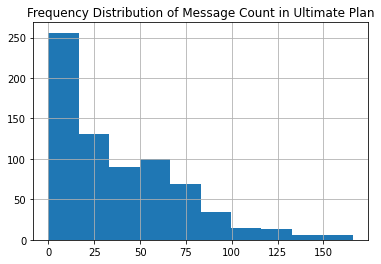

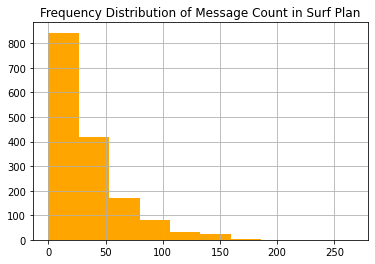

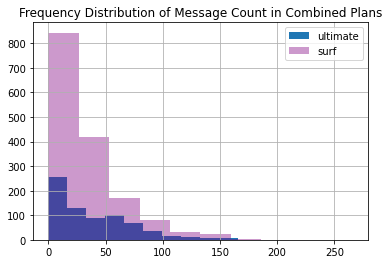

In [146]:
# Compare the number of messages users of each plan require each month.
print('Messages summary Ultimate Plan - \n', df['messages_count'][ultimate].describe())
print('Messages summary Surf Plan - \n', df['messages_count'][surf].describe())

print('----------------------------------------')

print('Messages Variance Ultimate Plan - ', df['messages_count'][ultimate].var())
print('Messages Variance Surf Plan - ', df['messages_count'][surf].var())

print('----------------------------------------')

# Generate histograms to view frequencies
df['messages_count'][ultimate].hist()
plt.title('Frequency Distribution of Message Count in Ultimate Plan')
plt.show()
df['messages_count'][surf].hist(color='orange')
plt.title('Frequency Distribution of Message Count in Surf Plan')
plt.show()

# Combine histograms with alpha to see overlay
df['messages_count'][ultimate].hist(label='ultimate')
df['messages_count'][surf].hist(color='purple', alpha=.4, label='surf')
plt.title('Frequency Distribution of Message Count in Combined Plans')
plt.legend()
plt.show()


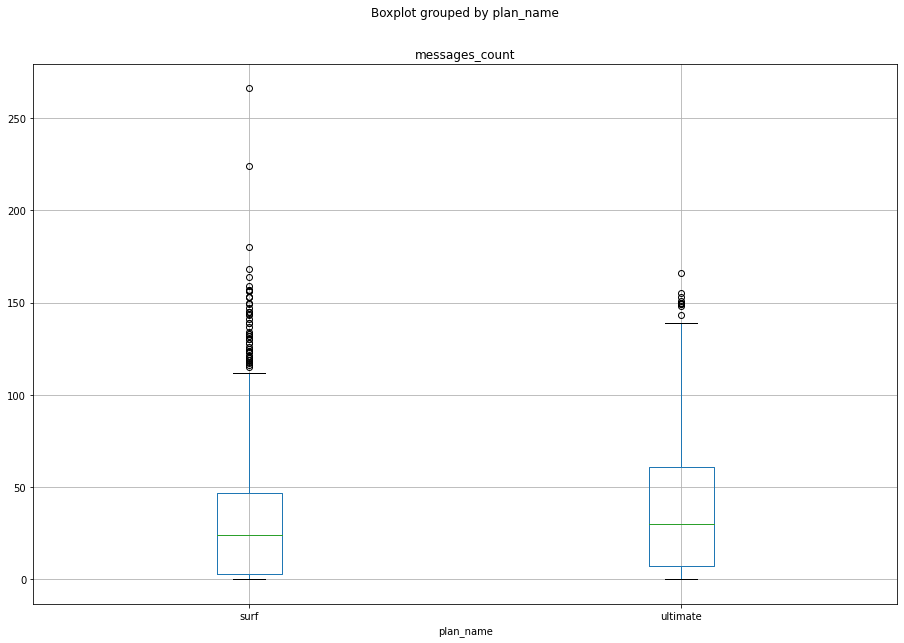

In [147]:
# Plot a boxplot to visualize the distribution of the messages sent
df.boxplot(column='messages_count', by='plan_name', figsize=(15,10))
plt.show()

#### Messages data findings
The histograms show that both plans have very similar distributions of messages sent. Most users are sending the amount in the first few buckets of the histogram (0-25, 25-50), with a pretty steep decline and only a few users sending high amounts of messages in a given month. 

The conclusion here is similar to the call data. There is no large difference in message usage from the users of the plans. Both the users on the surf and ultimate plan end up having very similar message sending patterns. The only slight finding we see here, is the average ultimate plan user will send *slightly* more messages versus the average surf user. The variance, average, and histogram distributions are all similar. 

### Internet

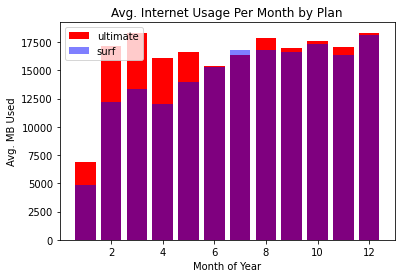

In [148]:
# Plotting Avg. mb usage per month per plan
avg_mb_df = df[['month', 'mb_used', 'plan_name']].groupby(['plan_name', 'month']).mean().reset_index()

plt.bar(avg_mb_df['month'][avg_mb_df['plan_name']=='ultimate'], avg_mb_df['mb_used'][avg_mb_df['plan_name']=='ultimate'], color='red', label='ultimate')
plt.bar(avg_mb_df['month'][avg_mb_df['plan_name']=='surf'], avg_mb_df['mb_used'][avg_mb_df['plan_name']=='surf'], color='blue', alpha=0.5, label='surf')
plt.title('Avg. Internet Usage Per Month by Plan')
plt.xlabel('Month of Year')
plt.ylabel('Avg. MB Used')
plt.legend()
plt.show()

Internet summary Ultimate Plan - 
 count      720.000000
mean     17214.699694
std       7851.897435
min          0.000000
25%      12666.955000
50%      16858.340000
75%      21014.527500
max      46595.330000
Name: mb_used, dtype: float64
Internet summary Surf Plan - 
 count     1573.000000
mean     16558.283490
std       8013.513327
min          0.000000
25%      11986.520000
50%      16829.310000
75%      20999.610000
max      70931.590000
Name: mb_used, dtype: float64
----------------------------------------
Internet Variance Ultimate Plan -  61652293.32385832
Internet Variance Surf Plan -  64216395.83802795
----------------------------------------


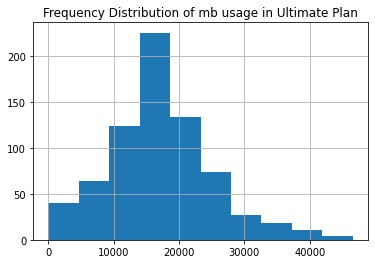

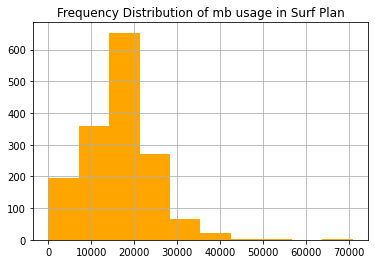

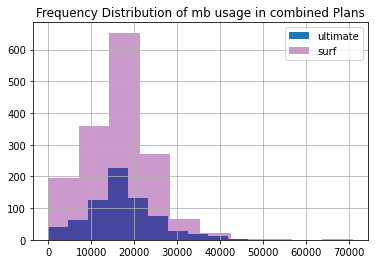

In [149]:
# Compare the mb data usage users of each plan require. 
print('Internet summary Ultimate Plan - \n', df['mb_used'][ultimate].describe())
print('Internet summary Surf Plan - \n', df['mb_used'][surf].describe())

print('----------------------------------------')

print('Internet Variance Ultimate Plan - ', df['mb_used'][ultimate].var())
print('Internet Variance Surf Plan - ', df['mb_used'][surf].var())

print('----------------------------------------')

# Generate histograms to view frequencies
df['mb_used'][ultimate].hist()
plt.title('Frequency Distribution of mb usage in Ultimate Plan')
plt.show()
df['mb_used'][surf].hist(color='orange')
plt.title('Frequency Distribution of mb usage in Surf Plan')
plt.show()

# Combine histograms with alpha to see overlay
df['mb_used'][ultimate].hist(label='ultimate')
df['mb_used'][surf].hist(color='purple', alpha=.4, label='surf')
plt.title('Frequency Distribution of mb usage in combined Plans')
plt.legend()
plt.show()


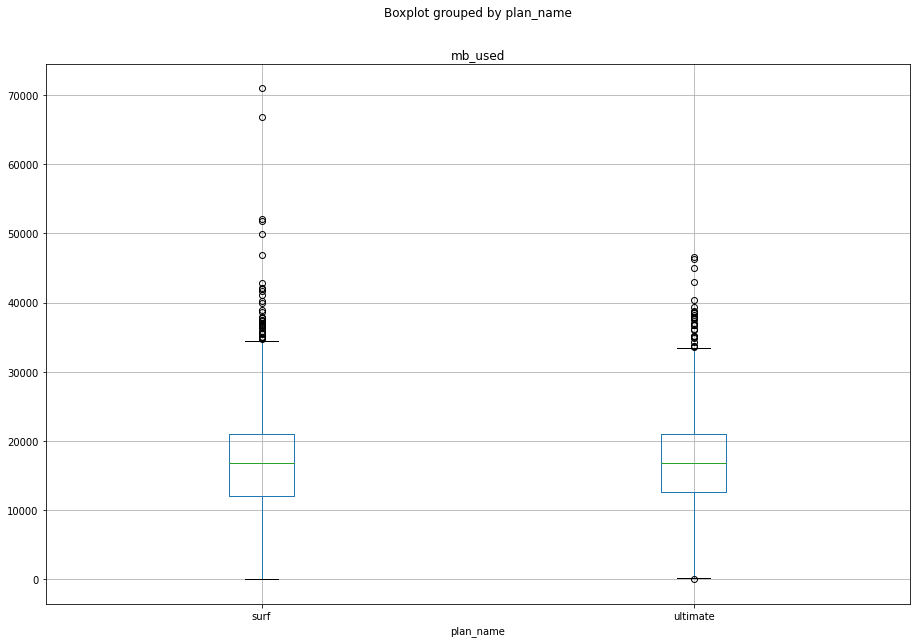

In [150]:
# Plot a boxplot to visualize the distribution of the mb internet usage
df.boxplot(column='mb_used', by='plan_name', figsize=(15,10))
plt.show()

#### Internet data findings
In the histograms, we can see that after the highest frequency bucket (between 10-20k mb), on the surf plan the distribution drops off very quickly, but on the ultimate plan there are still a few significant buckets. This matches up with the Avg. Ultimate plan user using just a little bit more internet versus the average Surf user. 

Again we find that usage between users on the Surf and Ultimate plans does not differ much when it comes to internet usage. While the average ultimate user does use more data, overall the frequency distributions, average, and variance remian similar across plans. There is nothing to point to different usage based on plans. 

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [151]:
df['extra_revenue'] = df['messages_revenue'] + df['internet_revenue'] + df['call_revenue']

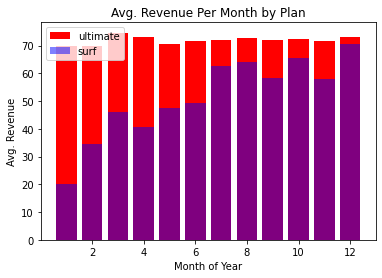

In [152]:
# Plotting Avg. revenue per plan by month
avg_rev_df = df[['month', 'total_revenue', 'plan_name']].groupby(['plan_name', 'month']).mean().reset_index()

plt.bar(avg_rev_df['month'][avg_rev_df['plan_name']=='ultimate'], avg_rev_df['total_revenue'][avg_rev_df['plan_name']=='ultimate'], color='red', label='ultimate')
plt.bar(avg_rev_df['month'][avg_rev_df['plan_name']=='surf'], avg_rev_df['total_revenue'][avg_rev_df['plan_name']=='surf'], color='blue', alpha=0.5, label='surf')
plt.title('Avg. Revenue Per Month by Plan')
plt.xlabel('Month of Year')
plt.ylabel('Avg. Revenue')
plt.legend()
plt.show()

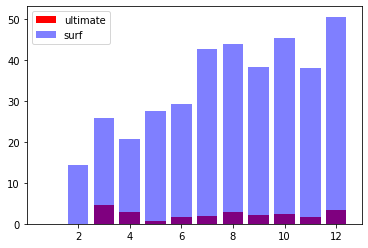

In [153]:
# Plotting Avg. extra revenue per plan by month
avg_rev_df = df[['month', 'extra_revenue', 'plan_name']].groupby(['plan_name', 'month']).mean().reset_index()

plt.bar(avg_rev_df['month'][avg_rev_df['plan_name']=='ultimate'], avg_rev_df['extra_revenue'][avg_rev_df['plan_name']=='ultimate'], color='red', label='ultimate')
plt.bar(avg_rev_df['month'][avg_rev_df['plan_name']=='surf'], avg_rev_df['extra_revenue'][avg_rev_df['plan_name']=='surf'], color='blue', alpha=0.5, label='surf')
plt.legend()
plt.show()

Revenue summary Ultimate Plan - 
 count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: total_revenue, dtype: float64
Revenue summary Surf Plan - 
 count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: total_revenue, dtype: float64
----------------------------------------
Revenue Variance Ultimate Plan -  129.8484855509195
Revenue Variance Surf Plan -  3067.835152293878
----------------------------------------


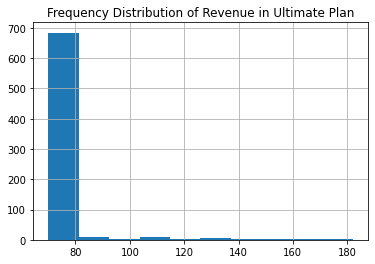

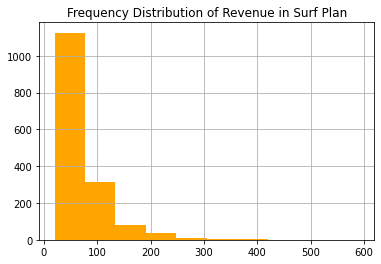

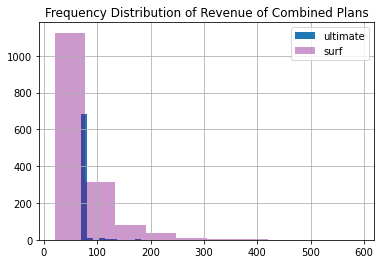

In [154]:
# Compare the revenue of each plan.
print('Revenue summary Ultimate Plan - \n', df['total_revenue'][ultimate].describe())
print('Revenue summary Surf Plan - \n', df['total_revenue'][surf].describe())

print('----------------------------------------')

print('Revenue Variance Ultimate Plan - ', df['total_revenue'][ultimate].var())
print('Revenue Variance Surf Plan - ', df['total_revenue'][surf].var())

print('----------------------------------------')

# Generate histograms to view frequencies
df['total_revenue'][ultimate].hist()
plt.title('Frequency Distribution of Revenue in Ultimate Plan')
plt.show()
df['total_revenue'][surf].hist(color='orange')
plt.title('Frequency Distribution of Revenue in Surf Plan')
plt.show()

# Combine histograms with alpha to see overlay
df['total_revenue'][ultimate].hist(label='ultimate', bins=10)
df['total_revenue'][surf].hist(color='purple', alpha=.4, label='surf', bins=10)
plt.title('Frequency Distribution of Revenue of Combined Plans')
plt.legend()
plt.show()

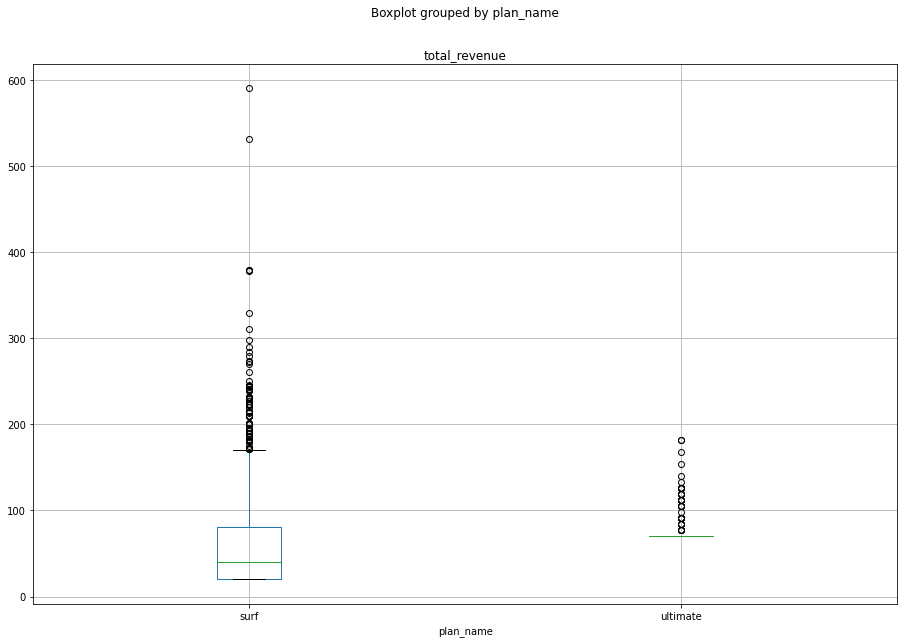

In [155]:
# Plot a boxplot to visualize the distribution of the revenue per plan
df.boxplot(column='total_revenue', by='plan_name', figsize=(15,10))
plt.show()

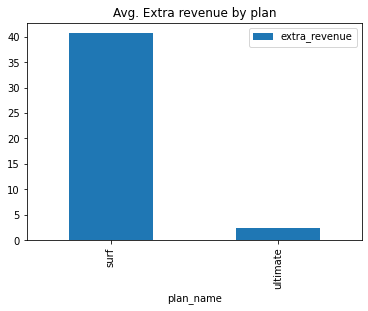

,plan_name,extra_revenue
0,surf,40.706408
1,ultimate,2.313889


In [156]:
avg_rev_df = df[['extra_revenue', 'plan_name']].groupby(['plan_name']).mean().reset_index()
avg_rev_df.plot.bar(x='plan_name', y='extra_revenue')
plt.title('Avg. Extra revenue by plan')
plt.show()
avg_rev_df

#### Revenue Data Findings
Here the histograms clearly show a difference. In the ultimate plan we can see most of our data centers around the first bucket. This can be explained by most Ultimate plan users paying their flat fee and not having to pay any overage/extra revenue for using extra services above their plan. 
The Surf distribution shows a wider range of values since the users pay a much more variable amount based on their overage usage. 
Here we find the biggest difference yet between the users of the ultimate and surf plans. While the ultimate plan revenues stay steady with a consistent average, low variance and only a few outliers - The Surf plan has high variance with a wider distribution. While most of the revenue generated by the ultimate plan comes from the plan cost itself, most of the surf revenue comes from the extra charges for going over on the three different services. 

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

Here we are going to test if there is a statistical difference between revenue from the users of the ultimate and the surf plans. 


<u><b>Hypotheses</b></u> 

H0 - There is no statistical difference between the two plans average Revenue 

H1 - There is a difference between the two plans revenues 

critical level - 1%

In [157]:
# Test the hypotheses
sample_1 = df['total_revenue'][ultimate]
sample_2 = df['total_revenue'][surf]

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-value: ', results.pvalue)


p-value:  2.862674510698644e-08


With the above P-value, we prove our H0, there is no statistical difference in the average revenue of users in the two plans. 

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

<u><b>Hypotheses</b></u> 

H0 - There is no statistical difference between the different regions average Revenue 

H1 - the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

critical level - 1%

In [158]:
# join city data to df
df = pd.merge(df, users_df[['user_id', 'city']], on='user_id', how='left')

In [159]:
# Create mask for NY-NJ cities
df[~df['city'].str.contains('NY-NJ')].head(1)

,user_id,month,mb_used,gb_used,messages_count,billable_minutes,call_count,plan_name,messages_included,mb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,messages_revenue,internet_revenue,call_revenue,total_revenue,extra_revenue,city
0,1000,12,1901.47,1.856904,11.0,124.0,16.0,ultimate,1000,30720,...,70.0,7.0,0.01,0.01,0.0,0.0,0.0,70.0,0.0,"Atlanta-Sandy Springs-Roswell, GA MSA"


In [160]:
# Test the hypotheses
sample_1 = df['total_revenue'][df['city'].str.contains('NY-NJ')]
sample_2 = df['total_revenue'][~df['city'].str.contains('NY-NJ')]

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-value: ', results.pvalue)

p-value:  0.043557431621342436


With a P-Value > .01, we disprove the null hypothesis -> we now believe there is a statistical difference between the users in the NY-NJ region versus the rest of the areas. 

H1 - the average revenue from users in the NY-NJ area is different from that of the users from the other regions

## General conclusion
Though the data was pretty clean there were a few assumptions made during the cleaning and analysis of the data. 
 - The largest assumption made, was that the data did not span Multiple years. When we did aggregations by month, we did not include a year - this means if there were multiple years of data our groupbys would be combining those as we did not include a year in the groupby clause. 
 - Another assumption was working with USD in columns. This caused us to Float datatypes over ints so we could accurately calculate decimals/cents in the numbers. 
 
Overall we covered many different topics in Statistical Data Analysis, we saw the users behavior patterns did not differe much when we compared them by plan. With our brief test using location, we did see a difference. This opens up a future analysis where we perform statistical analysis of revenues across the many different regions of the users to see if we find patterns/insight into usasge. 